# Sinusoid

### Derivation of Sinusoid

In [ ]:
import numpy as np
import pygame
from pygame.locals import *
 
 
class trig:
 
    # to collect all the ordinates
    Ys = []
 
    def __init__(self, width=1600, height=900,
                 gap=100, fps=60, radius=100):
 
        # width of the window
        self.width = width
 
        # height of the window
        self.height = height
 
        # frame rate per second
        self.fps = fps
        self.screen = pygame.display.set_mode((self.width,
                                               self.height))
 
        # setting the screen dimensions
        self.clock = pygame.time.Clock()
 
        # the distance between the radius
        self.gap = gap
 
        #  pointer and the starting point of the curve
 
        # the will be the x axis
        self.t = 0
 
        # length of the radius of the circle
        self.r = radius
 
        self.run = True
        while self.run:
            self.clock.tick(self.fps)
 
            # filling the whole canvas with white background
            self.screen.fill('white')
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    self.run = False
            if event.type == KEYDOWN:
                if event.key == K_ESCAPE:
                    pygame.quit()
 
            # center of the circle
            x, y = 400, 400
 
            x += (self.r * np.cos(self.t))
            y += (self.r * np.sin(self.t))
            pygame.draw.line(self.screen, 'grey',
                             (400, 400),
                             (400+1000, 400), 3)
 
            # this will create a horizontal line
 
            pygame.draw.line(self.screen,
                             'grey',
                             (400, 400 + self.r),
                             (400+1000, 400+self.r), 3)
 
            # this will create a horizontal line above the circle
            pygame.draw.line(self.screen,
                             'grey',
                             (400, 400 - self.r),
                             (400+1000, 400-self.r),
                             3)
 
            # this will create a horizontal
            # line below the circle
            pygame.draw.circle(self.screen,
                               'blue',
                               (400, 400),
                               self.r, 5)
 
            # this will create a circle
            # with center (400,400)
            pygame.draw.line(self.screen,
                             'green',
                             (400, 400),
                             (x, y), 3)
 
            # this will draw the radius of the circle
 
            # inserting the y values
            # at the beginning of the Ys list
            self.Ys.insert(0, y)
 
            if len(self.Ys) > 1100 - self.gap:
                self.Ys.pop()
 
            # this will restrict the length
            # of the Ys to a certain limit
            # so that the animation
            # doesn't get out of the screen
 
            pygame.draw.line(self.screen, 'black', (x, y),
                             (400+self.gap, self.Ys[0]), 3)
 
            # this will create the joining line
            # between the curve and the circle's radius
 
            for i in range(len(self.Ys)):
                pygame.draw.circle(self.screen, 'red',
                                   (i+400+self.gap, self.Ys[i]), 1, 1)
 
                # this will create the sin curve
                # it will create bunch of small circles
                # with varying centers in such a
                # way that it will trajectory of
                # the centers of all those small circles
                # will give rise to a sine curve
 
            if event.type == KEYDOWN:
                if event.key == K_RIGHT:
                    self.gap += 1
                if event.key == K_LEFT:
                    self.gap -= 1
 
             # this part of code gives the user
             # the freedom to set the speed of the
             # animation and also set the gap
             # between the circle and the sine curve
 
            self.t += 0.01
            pygame.display.update()
 
 
if __name__ == '__main__':
    sin = trig()
    pygame.quit()

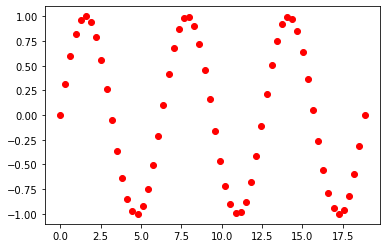

In [1]:
### demonstration of sinusoids
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML
a = 6
t = np.linspace(0,a *np.pi,10*a)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,a*np.pi],[-1,1], 'o', color='red')

animate = lambda i: l.set_data(t[:i], x[:i])

#ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))


#HTML(ani.to_html5_video())
HTML(matplotlib.animation.FuncAnimation(fig, animate, frames=len(t)*a).to_html5_video())

### Properties of sinusoids
#### Cycle, Period and frequency
- Cycle = the pattern that is repeated over and over again
- Period (T) = the length of time that it takes for one cycle to occur
- Frequency (F) = Number of repetitions of cycles per second 
- Relationship between T and F: F = $\frac{1}{T}$
#### Amplitude

Text(0, 0.5, 'Amplitude')

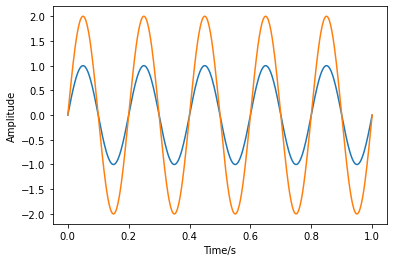

In [3]:
def sinewav(a,f,t):
    return a*np.sin(2*np.pi*f*t)

f = 5
dur = 1
a=1
t = np.linspace(0,dur,f*dur*100, endpoint=True)
y1 = sinewav(a,f, t)
y2 = sinewav(2*a,f, t)

plt.plot(t,y1)
plt.plot(t,y2)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")

In [4]:
### Sounds of different pure frequencies
import IPython.display as ipd
from scipy import signal
fs=44100
f=19000
dur=2
a = 1
t= np.linspace(0,dur,dur*fs, endpoint=True)
y = sinewav(a,f, t)

ipd.Audio(y,rate=fs) 

### What is special of sinusoids?

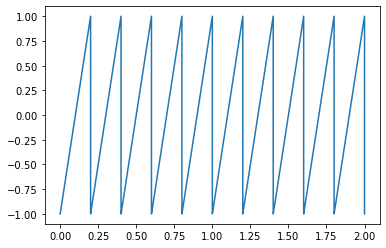

In [5]:
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

In [6]:
def sawtooth(k, f, t):
    y = 0
    for i in range(1, k+1):
        y += 1/2 - 1/np.pi * (-1)**i*np.sin(2*np.pi*i*f*t) / i
    return y

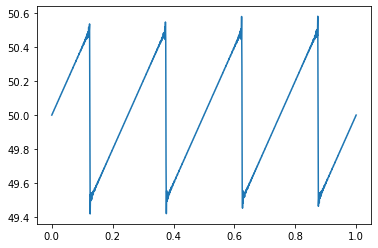

In [10]:
k=100
f=4000
dur = 1
t = np.linspace(0, dur, 1000*dur, endpoint=True)
y = np.array([sawtooth(k, f, i) for i in t])
plt.plot(t, y)

In [23]:
ipd.Audio(y,rate=1000) 

In [24]:
### Sound wave
import soundfile as sf

data, samplerate = sf.read('./EF_001_0005.wav')

Text(0, 0.5, 'Sound Pressure')

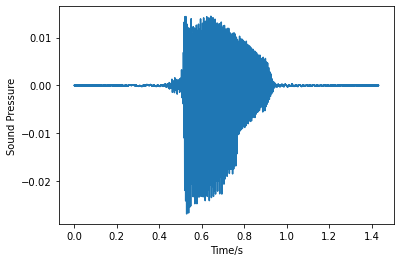

In [25]:
t = np.linspace(0, len(data)/samplerate, len(data), endpoint=True)
plt.plot(t, data)
plt.xlabel("Time/s")
plt.ylabel("Sound Pressure")

In [26]:
ipd.Audio(data, rate=samplerate)

Text(0, 0.5, 'Amplitude')

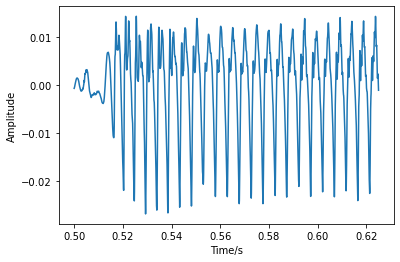

In [27]:
plt.plot(t[8000:10000], data[8000:10000])
plt.xlabel("Time/s")
plt.ylabel("Amplitude")